#  HWK4 Part 2

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### a)  Download the fashion-MNIST dataset (train and test set).

In [20]:
train_data = torch.load("../../data/fashion-mnist/train_data.pt")
train_label = torch.load("../../data/fashion-mnist/train_label.pt")
test_data = torch.load("../../data/fashion-mnist/test_data.pt")
test_label = torch.load("../../data/fashion-mnist/test_label.pt")

### b) Make a one layer net with a softmax at the end (carefully choose the dimension in which to take the softmax).

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        
        x = self.layer(x)
        p = torch.softmax(x, dim=1)
            
        return p
    
net = one_layer_net(28*28, 10)
print(net)

one_layer_net(
  (layer): Linear(in_features=784, out_features=10, bias=False)
)


### c) Train the network. Use batch size = 200 and do 5,000 iterations.

In [6]:
bs = 200

criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    indices = torch.LongTensor(bs).random_(0,60000)
    minibatch_data = train_data[indices]
    minibatch_label = train_label[indices]
    
    #reshape them to fit the network
    inputs = minibatch_data.view(bs, 28*28)

    # feed the input to the net  
    prob = net(inputs)
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

### d) Choose an image at random from the test, display it using the utils.show() function, feed it to the network, and display the confidence scores using  the "utils.show_prob_fashion_mnist()" function.

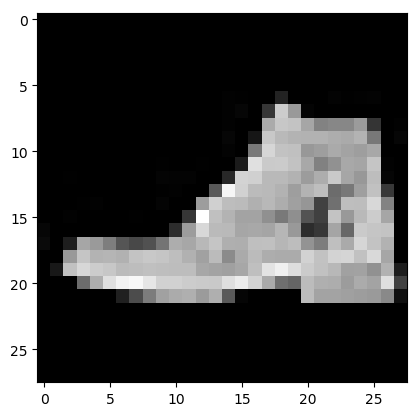

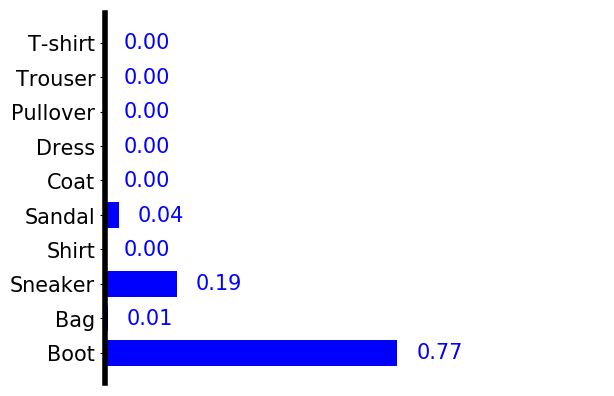

In [26]:
idx = randint(0, 10000)
im = test_data[idx]
utils.show(im)
prob = net(im.view(1, 28*28))
utils.show_prob_fashion_mnist(prob)

# ------------------------------------------------
# Now we are going to look at the templates of this trained net
# ------------------------------------------------

### Remember how in class I showed you the templates learned by a one layer network when it is trained on the MNIST dataset. Our goal now is to visualize the templates that were learned by the network that you just trained on fashion-MNIST. 

### We are going to use a blue-black-red scale to visualize our template. Blue corresponds to negative values, black corresponds to zero, and red to positive values. I have written for you a function  "utils.show_template()" that does this. This function takes a matrix as argument and displays the intensities according to this blue-black-red scale.  Here is an example of how to use this function:

tensor([[-0.2000, -0.1000, -0.2000, -0.3000],
        [-0.2000,  0.0000,  0.1000, -0.2000],
        [-0.2000,  0.0000,  0.3000, -0.2000],
        [-0.2000, -0.2000, -0.2000, -0.2000]])


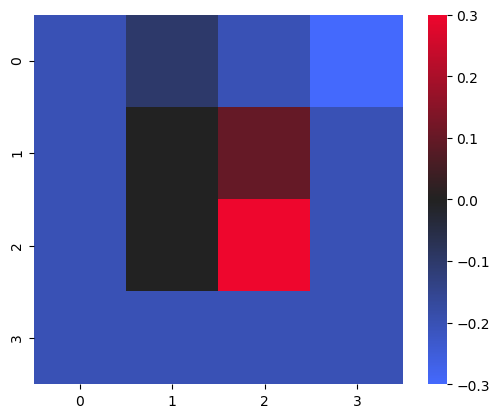

In [27]:
A=torch.Tensor([[-0.2 ,-0.1, -0.2, -0.3], [-0.2 ,0, 0.1, -0.2],[-0.2 ,0, 0.3, -0.2] ,  [-0.2 ,-0.2, -0.2, -0.2] ])
print(A)
utils.show_template(A)

### e) In the markdown cell below, briefly explain what is a template in a one-layer net? Where do they live? 

A templates are each row in the weight matrix reshaped to a 28*28 matrix (each row represents template for different item)

### f) Extract from the network that you trained at the beginning of this notebook the template corresponding to the TROUSER category.

The ten categories are indexed as follow:

Tshirt (class 0), 
Trousers (class 1),
Pullover (class 2), 
Dress (class 3),
Coat (class 4),
Sandal (class 5),
Shirt (class 6),
Sneaker (class 7),
Bag (class 8),
Boot (class 9)


In [42]:
labels = ["Tshirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
weights = []
for template in net.layer.weight:
    weights.append(template.view(28,28))
templates = dict(zip(labels, weights))

### g) Show the template for Tshirt

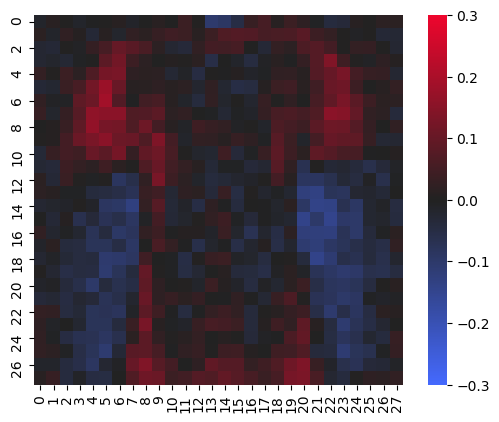

In [45]:
utils.show_template(templates["Tshirt"])

### g) Show the template for Bags

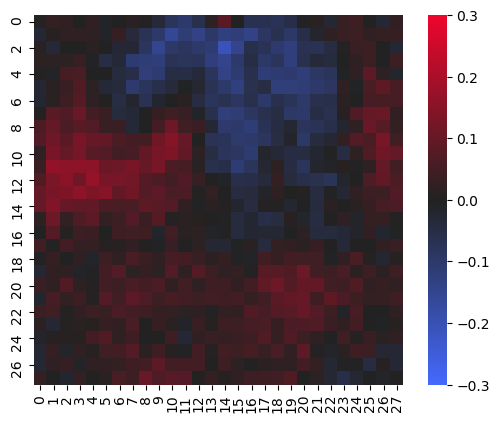

In [47]:
utils.show_template(templates["Bag"])

### h) Show the template for Sneakers

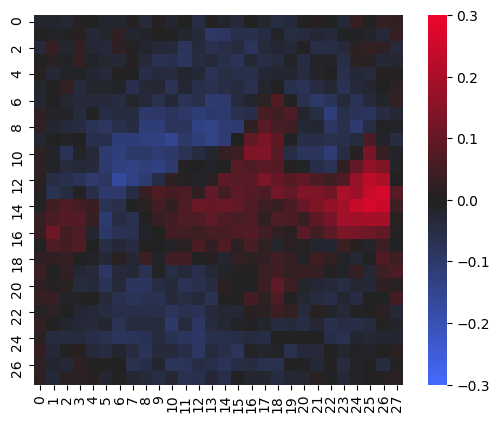

In [48]:
utils.show_template(templates["Sneaker"])

### i) Show the template for Dress

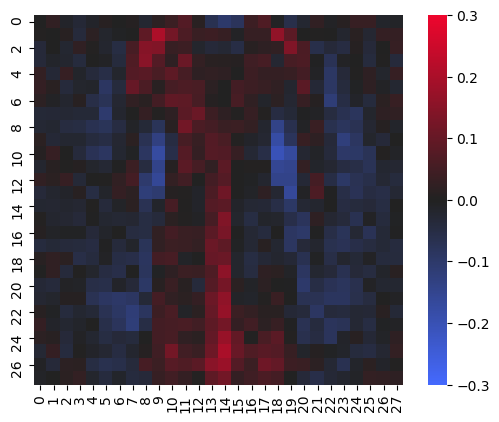

In [49]:
utils.show_template(templates["Dress"])